Copyright (c) 2024 Giovanni Squillero <giovanni.squillero@polito.it>
https://github.com/squillero/computational-intelligence
Free for personal or classroom use; see LICENSE.md for details.

# Set Cover problem

Specifications of the problem : [https://en.wikipedia.org/wiki/Set_cover_problem](https://en.wikipedia.org/wiki/Set_cover_problem)

## Data

In [362]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import accumulate
from icecream import ic

UNIVERSE_SIZE = 10_000
NUM_SETS = 1_000
DENSITY = 0.2

## Intialization

In [363]:
SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

### Helper Functions

In [364]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## First solution

At first, I just wanted to have a minimal working hill climber to upgrade it later.

As discussed in class, we can define the fitness of a solution with this function :

In [365]:
def fitness(solution: np.ndarray) -> tuple[bool, int]:
    """"Return the fitness of a solution (to be maximized)"""
    return (valid(solution), -cost(solution))

We can then define a simple tweak that perform one random mutation :

In [366]:
def tweak(solution: np.ndarray) -> np.ndarray:
    """tweak function that perform one random mutation"""
    new_sol = solution.copy()
    index = np.random.randint(NUM_SETS)
    new_sol[index] = not new_sol[index]
    return new_sol

And finally define our first hill_climbing function for the set_cover problem :

In [367]:
def set_cover(initial_solution: np.ndarray) -> tuple[np.ndarray, list[int]] :
    """Perform a set_cover algorithm on a given initial solution"""
    solution = initial_solution.copy()
    history = [fitness(solution)[1]]
    for _ in range(1000):
        test_solution = tweak(solution)
        history.append(fitness(test_solution)[1])
        if fitness(test_solution) > fitness(solution):
            solution = test_solution
    return solution, history

Let's run it and plot what the fitness look like.

ic| fitness(solution): (np.True_, np.float64(-1651145.98388646))


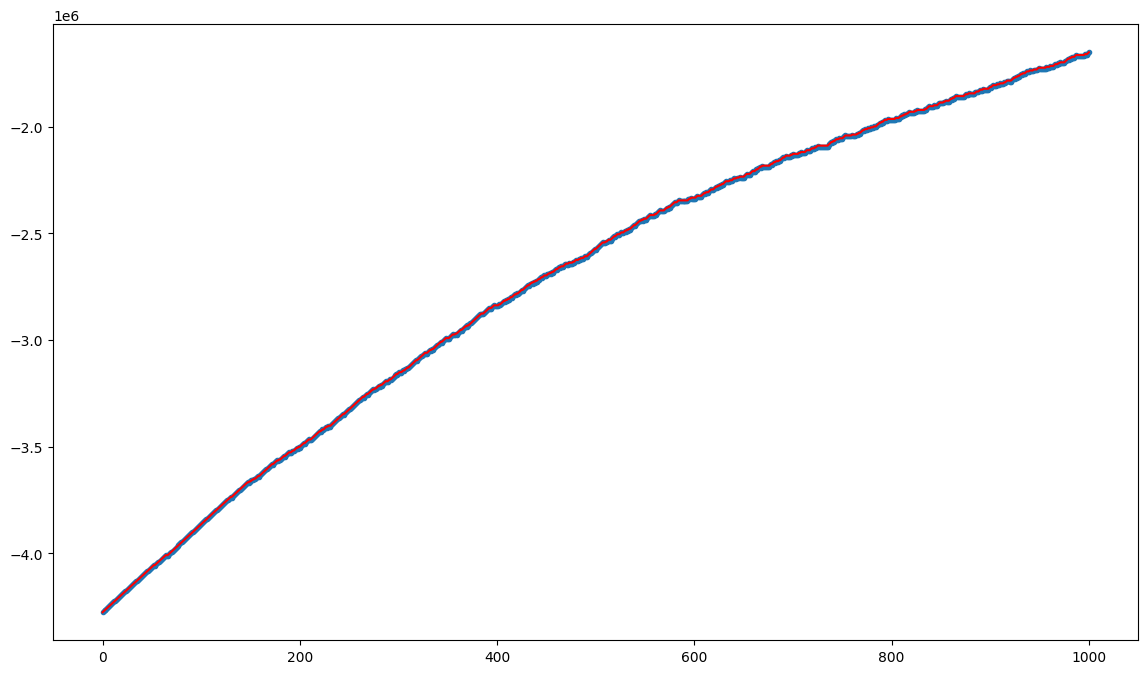

In [368]:
initial_solution = np.full(NUM_SETS, True)

solution, history = set_cover(initial_solution)

ic(fitness(solution))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

We can see that this is pretty slow to climb.

## Improvement of the tweak function

The reason why we don't improve is because our tweak function focus on exploitation and not enougth on exploration.

Let's update it to allow more large steps.

In [369]:
def tweak(solution: np.ndarray) -> np.ndarray:
    """tweak function that perform a mutation on n random index according to a probability"""
    mask = np.random.random(NUM_SETS) < 0.01 # For each sets, chance of 1% to mutate
    new_sol = np.logical_xor(solution, mask)
    return new_sol

Let's run it again and see what happens.

ic| fitness(solution): (np.True_, np.float64(-1139135.143902306))


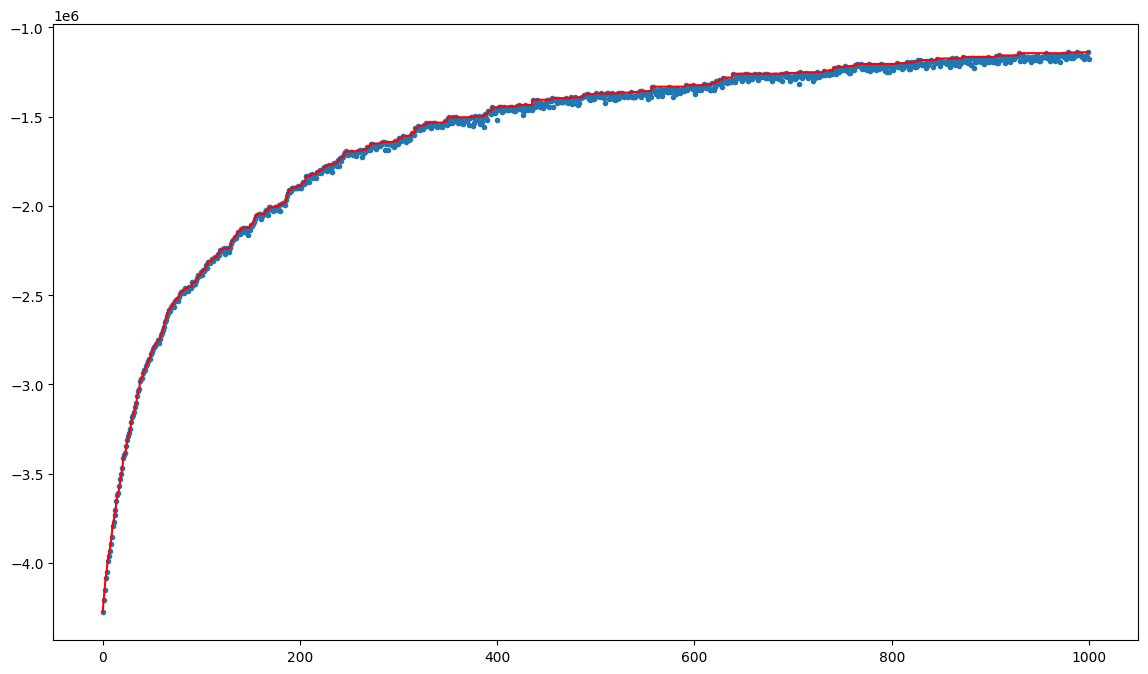

In [370]:
solution, history = set_cover(initial_solution)

ic(fitness(solution))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")



The result is a bit better but still too many of our try are not worth it.

## Improvement of the hill climbing function

We always start from the bottom of the valids solutions, we can improve the algorithm by starting from a random position and also performing multiple times the algorithm to select the better one. We compare the local optimums.

ic| fitness(solution): (np.True_, np.float64(-1033880.5504750079))


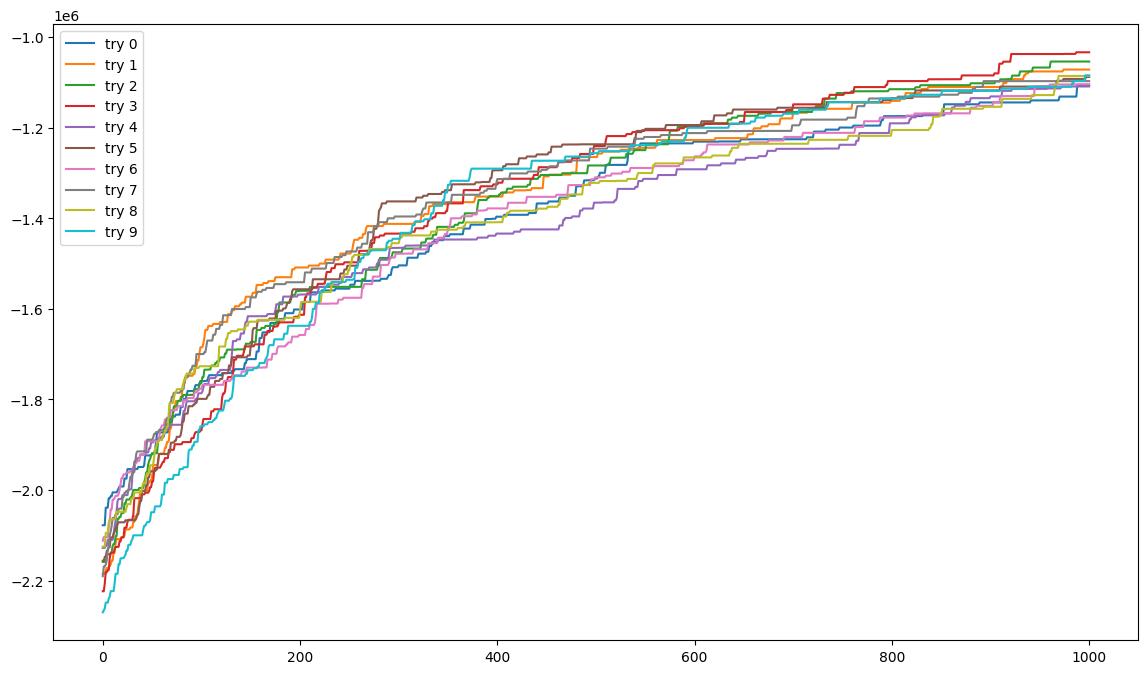

In [371]:
def multiple_set_cover():
    """Perform multiple time a set_cover algorithm and return the best one"""
    solution = np.random.random(NUM_SETS) < .5
    plt.figure(figsize=(14, 8))
    for i in range(10):
        new_solution = np.random.random(NUM_SETS) < .5
        new_solution, history = set_cover(new_solution)
        plt.plot(
            range(len(history)),
            list(accumulate(history, max)),
            label=f"try {i}"
        )
        if (fitness(new_solution) > fitness(solution)):
            solution = new_solution
    ic(fitness(solution))
    plt.legend()
    plt.show()
    return

multiple_set_cover()